In [316]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [317]:
bank = pd.read_csv("bank-additional-full.csv", sep=';')

In [318]:
#basic descriptive statistics
# higth sd in "balance", "duration", "campaign", "pdays" "previous" which indicates a fairly wide spread of data
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


SD bigger then mean(duration,campaign,previous,emp.var.rate,cons.conf.idx)- high variation between values, and abnormal distribution for data.  A smaller standard deviation indicates that more of the data is clustered about the mean while A larger once indicates the data are more spread out.

In [319]:
bank.head(100)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,45,services,married,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
96,42,management,married,university.degree,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
97,53,admin.,divorced,university.degree,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
98,37,technician,single,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Attribute Information:

Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

https://archive.ics.uci.edu/ml/datasets/bank+marketing


In [320]:
bank.shape

(41188, 21)

Data Cleaning

In [321]:

bank['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [322]:
#Often times, we want to know what percentage of the whole is for each value that appears in the column. 
#To calculate this in pandas with the value_counts() method, set the argument normalize to True.
bank['y'].value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

That makes it highly unbalanced, the positive class of target variable for 11.26%

In [323]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [324]:
#Check the datatypes of the attributes.
bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [325]:
#Are there any missing values in the dataset?
bank.isnull().values.any()

False

In [326]:
bank.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [327]:
bank.isin([0]).any().any()

True

In [328]:
#How many o values in every attribute
#Knn cannot have 0 or Nan 

bank.isin([0]).sum()

age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
month                 0
day_of_week           0
duration              4
campaign              0
pdays                15
previous          35563
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
dtype: int64

In [329]:
#previous 35563 is "0" (35563/41188 no data in this attribute ,I will drop this attribute)
bank = bank.drop(['previous'], axis=1)

In [330]:
#Colculating the mean
duration_mean = bank['duration']
durationMean = duration_mean.mean()
durationMean

258.2850101971448

In [331]:
#replacing all 0 valeuse with mean of that column
bank = bank.replace(0, durationMean)

In [332]:
bank.isin([0]).any().any()

False

In [333]:
bank.isin([0]).sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [334]:
#In the ‘pdays’ column, it is observed that 999 makes 96% of the values of the column. 
#from attribute information above 999 means client was not previously contacted
# I suggest to drop this column as there is not enough information for further analysis.

bank['pdays'].value_counts(normalize=True)

999.00000    0.963217
3.00000      0.010658
6.00000      0.010003
4.00000      0.002865
9.00000      0.001554
2.00000      0.001481
7.00000      0.001457
12.00000     0.001408
10.00000     0.001263
5.00000      0.001117
13.00000     0.000874
11.00000     0.000680
1.00000      0.000631
15.00000     0.000583
14.00000     0.000486
8.00000      0.000437
258.28501    0.000364
16.00000     0.000267
17.00000     0.000194
18.00000     0.000170
22.00000     0.000073
19.00000     0.000073
21.00000     0.000049
25.00000     0.000024
26.00000     0.000024
27.00000     0.000024
20.00000     0.000024
Name: pdays, dtype: float64

In [335]:
bank = bank.drop(['pdays'], axis=1)


In [336]:
#In the ‘poutcome’ column, it is observed that nonexistent + failure makes 96.6% of the values of the column. 
#from attribute information ‘poutcome’ is  outcome of the previous marketing campaign
# I will not drop this column as a success rate 3.3% might be interesting for further analysis.
bank['poutcome'].value_counts(normalize=True)

nonexistent    0.863431
failure        0.103234
success        0.033335
Name: poutcome, dtype: float64

In [337]:
#campaign: number of contacts performed during this campaign and for this client
bank['campaign'].value_counts(normalize=True)

1     0.428329
2     0.256628
3     0.129674
4     0.064363
5     0.038822
6     0.023769
7     0.015271
8     0.009712
9     0.006871
10    0.005463
11    0.004297
12    0.003035
13    0.002234
14    0.001675
17    0.001408
16    0.001238
15    0.001238
18    0.000801
20    0.000728
19    0.000631
21    0.000583
22    0.000413
23    0.000388
24    0.000364
27    0.000267
29    0.000243
28    0.000194
26    0.000194
25    0.000194
31    0.000170
30    0.000170
35    0.000121
32    0.000097
33    0.000097
34    0.000073
42    0.000049
40    0.000049
43    0.000049
56    0.000024
39    0.000024
41    0.000024
37    0.000024
Name: campaign, dtype: float64

In [338]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.0,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149.0,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226.0,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151.0,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307.0,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [339]:
#Let's check for duplicates
bank.duplicated().any()

True

In [340]:
#this doesn't seem like the case of some customers randomly having similar details. 
#It looks like the data duplication happened while entering the data.
bank[bank.duplicated(keep = False)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124.0,1,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124.0,1,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,88.0,1,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88.0,1,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331.0,2,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331.0,2,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43.0,3,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43.0,3,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128.0,1,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128.0,1,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


In [341]:
#Let's remove these duplicate rows.
bank.drop_duplicates(inplace = True)


In [342]:
bank.shape

(41176, 19)

In [343]:
bank['default'].value_counts(normalize=True)

no         0.791165
unknown    0.208762
yes        0.000073
Name: default, dtype: float64

Exploratory Data Analysis

To obtain a better understanding of the dataset, the distribution of key variables and the relationships among them were plotted.

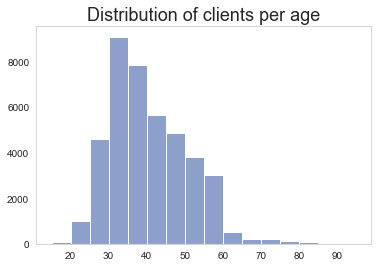

In [344]:
#Let's see the distribution of clients per age.
base_color = sns.color_palette('Set2')[2]

age_bins = np.arange(15, 100, 5)
plt.hist(data = bank, x = 'age', bins = age_bins, color = base_color);
plt.title("Distribution of clients per age", fontsize=18)
plt.grid();

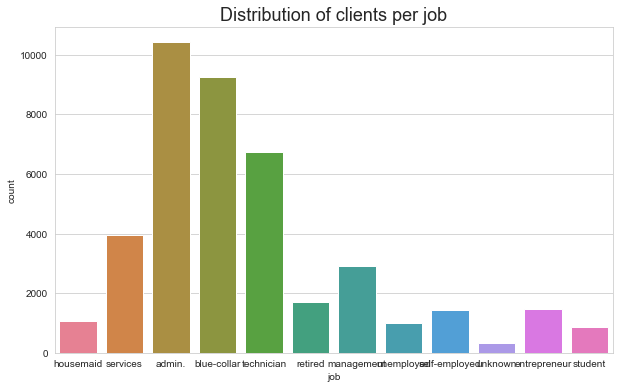

In [345]:
#Let's see the distribution of clients per job.
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.title("Distribution of clients per job", fontsize=18)
sns.countplot(x="job", data=bank, palette='husl');

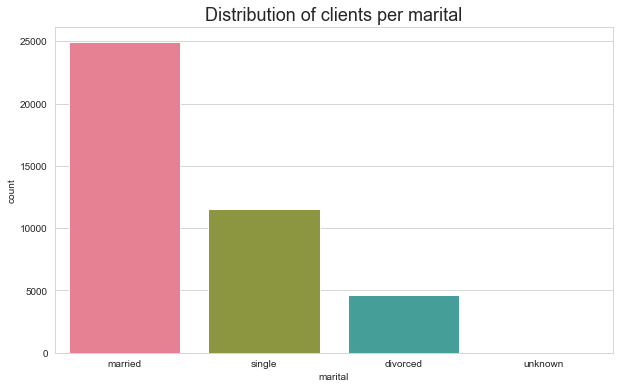

In [346]:
#Let's see the distribution of clients per job.
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.title("Distribution of clients per marital", fontsize=18)
sns.countplot(x="marital", data=bank, palette='husl');

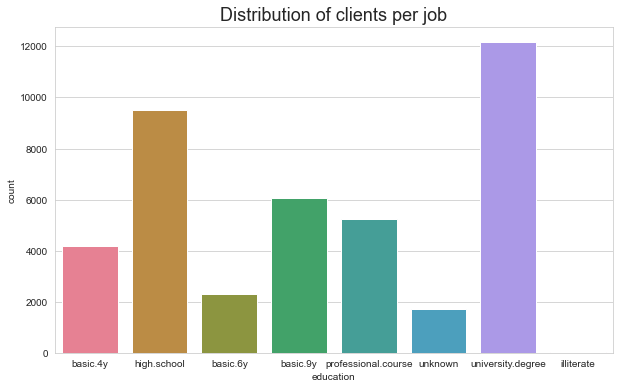

In [347]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.title("Distribution of clients per job", fontsize=18)
sns.countplot(x="education", data=bank, palette='husl');

In [348]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [349]:
#The temp object here is a pandas.series object which does not have a iplot method when not linked to plotly. 
#We need cufflinks to link plotly to pandas and add the iplot method:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

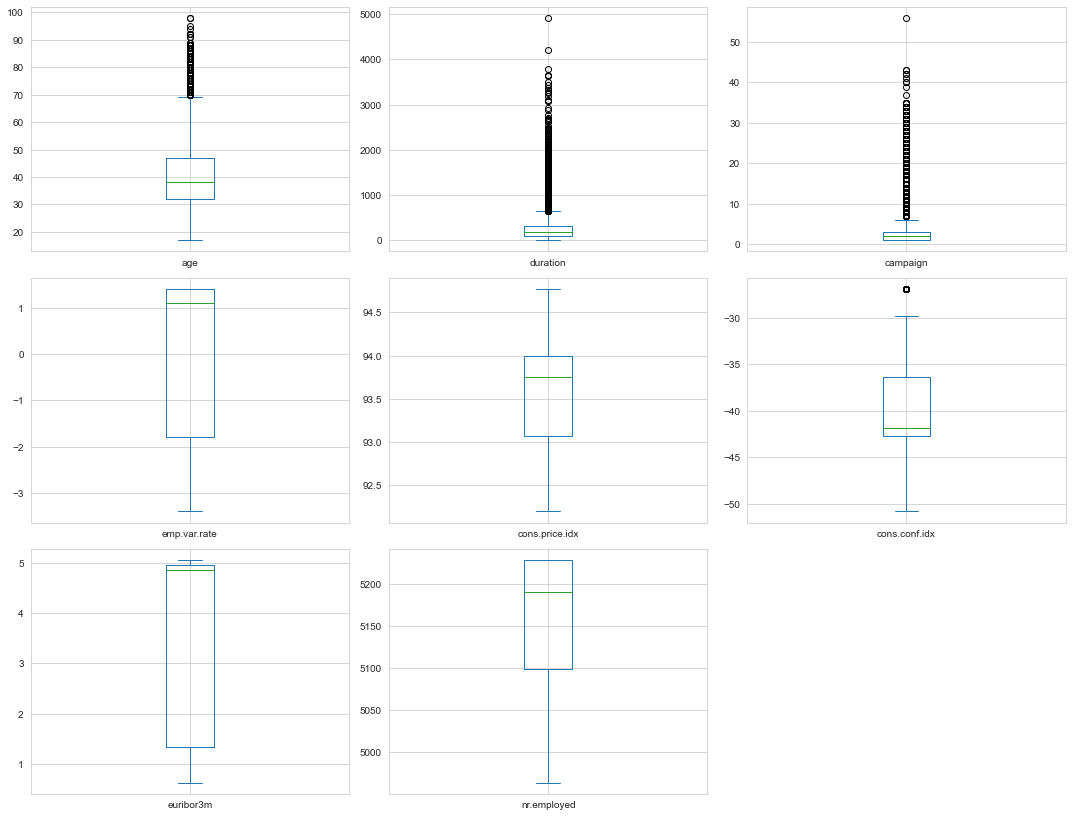

In [350]:
bank.plot(kind='box',subplots=True,layout=(4,3),figsize=(15,15))
plt.tight_layout()

In [351]:
#default: has credit in default? (categorical: 'no','yes','unknown')
bank['default'].iplot(kind='hist',bins=25)

In [352]:
bank['housing'].iplot(kind='hist',bins=25)

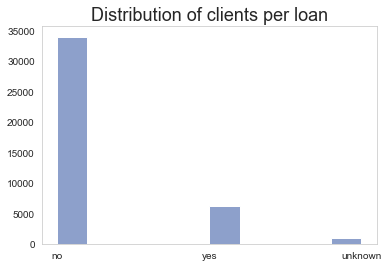

In [354]:
base_color = sns.color_palette('Set2')[2]
plt.hist(data = bank, x = 'loan', color = base_color);
plt.title("Distribution of clients per loan", fontsize=18)
plt.grid();

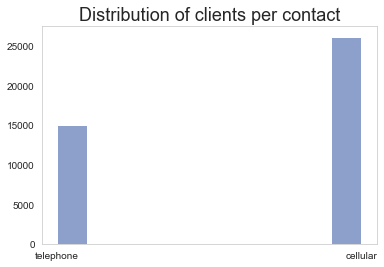

In [355]:
base_color = sns.color_palette('Set2')[2]
plt.hist(data = bank, x = 'contact', color = base_color);
plt.title("Distribution of clients per contact", fontsize=18)
plt.grid();


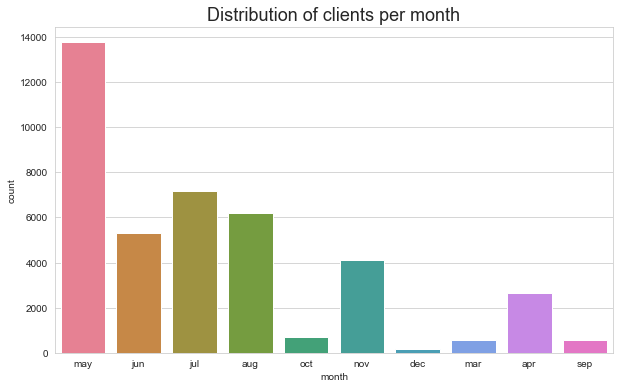

In [356]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.title("Distribution of clients per month", fontsize=18)
sns.countplot(x="month", data=bank, palette='husl');

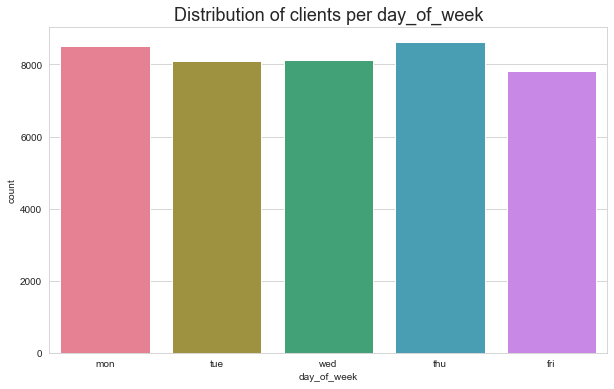

In [357]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.title("Distribution of clients per day_of_week", fontsize=18)
sns.countplot(x="day_of_week", data=bank, palette='husl');

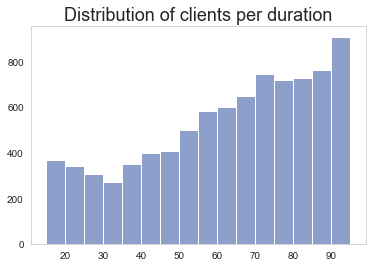

In [358]:
base_color = sns.color_palette('Set2')[2]

duration_bins = np.arange(15, 100, 5)
plt.hist(data = bank, x = 'duration', bins = duration_bins, color = base_color);
plt.title("Distribution of clients per duration", fontsize=18)
plt.grid();

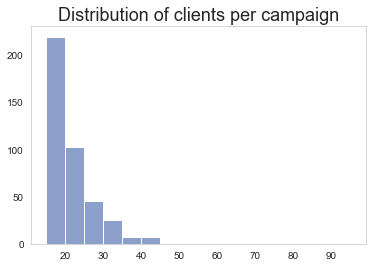

In [359]:
base_color = sns.color_palette('Set2')[2]

campaign_bins = np.arange(15, 100, 5)
plt.hist(data = bank, x = 'campaign', bins = campaign_bins, color = base_color);
plt.title("Distribution of clients per campaign", fontsize=18)
plt.grid();

<AxesSubplot:title={'center':'Deposit value counts'}>

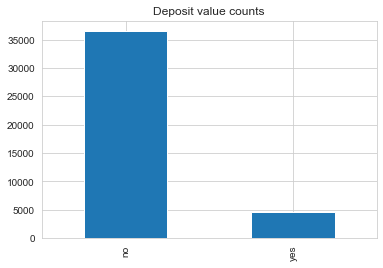

In [360]:
value_counts = bank['y'].value_counts()

value_counts.plot.bar(title = 'Deposit value counts')

<AxesSubplot:title={'center':'Job and deposit'}>

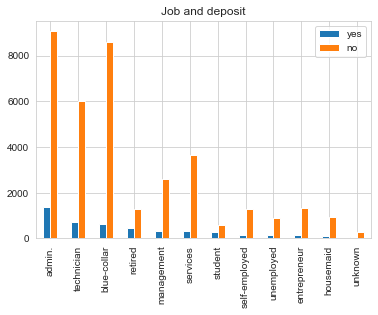

In [361]:
#job and deposit
j_bank = pd.DataFrame()

j_bank['yes'] = bank[bank['y'] == 'yes']['job'].value_counts()
j_bank['no'] = bank[bank['y'] == 'no']['job'].value_counts()

j_bank.plot.bar(title = 'Job and deposit')

<AxesSubplot:title={'center':'Marital status and deposit'}>

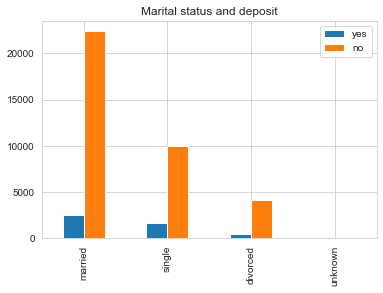

In [362]:
#marital status and deposit
j_bank = pd.DataFrame()

j_bank['yes'] = bank[bank['y'] == 'yes']['marital'].value_counts()
j_bank['no'] = bank[bank['y'] == 'no']['marital'].value_counts()

j_bank.plot.bar(title = 'Marital status and deposit')

<AxesSubplot:title={'center':'Type of contact and deposit'}>

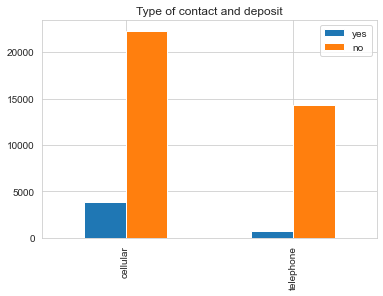

In [363]:
#type of contact and deposit
j_bank = pd.DataFrame()

j_bank['yes'] = bank[bank['y'] == 'yes']['contact'].value_counts()
j_bank['no'] = bank[bank['y'] == 'no']['contact'].value_counts()

j_bank.plot.bar(title = 'Type of contact and deposit')

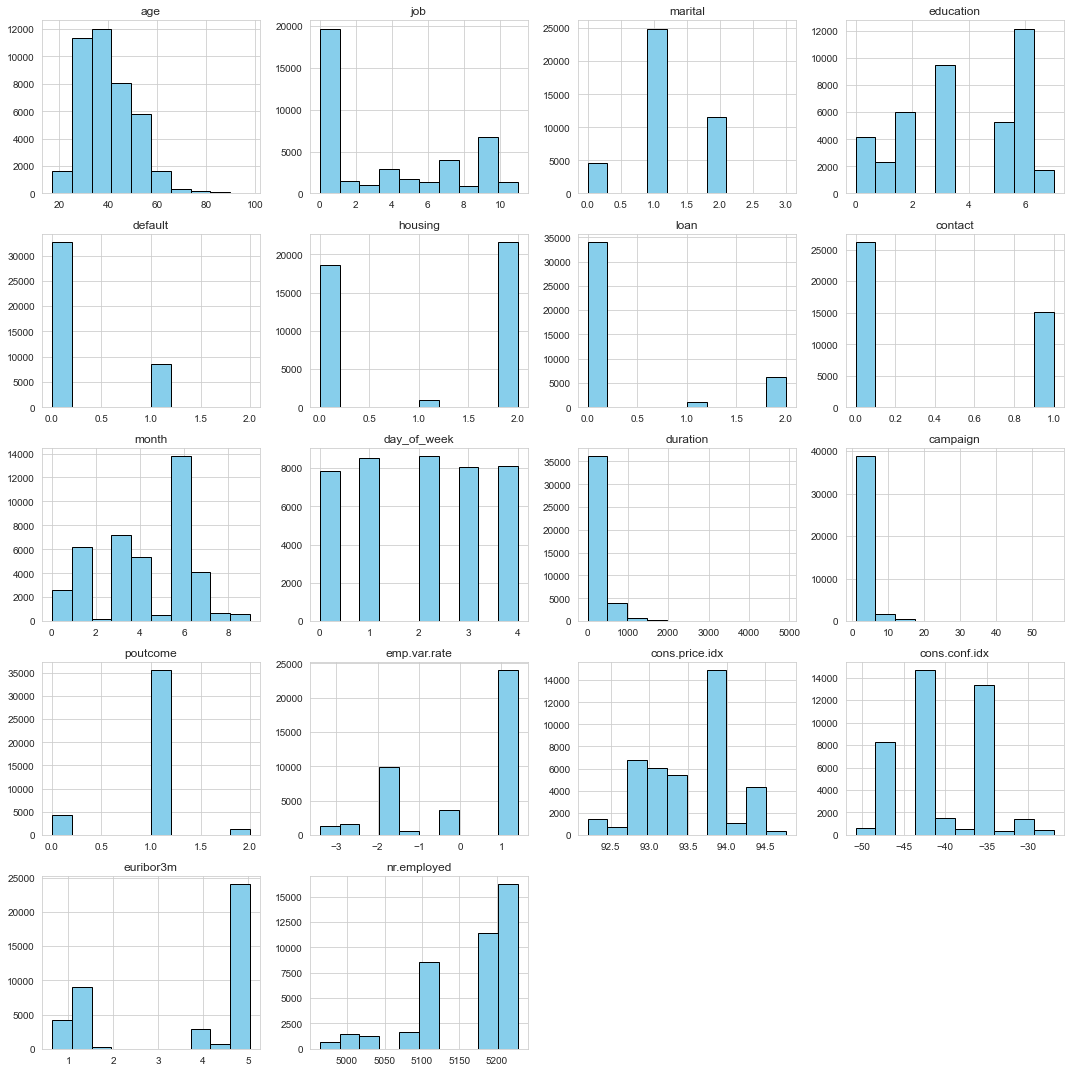

In [314]:
#Histogram for the numerical attributes
bank.hist(figsize=(15,15),edgecolor='k',color='skyblue')
plt.tight_layout()
plt.show()

In [315]:
#The dataset contains object type variables. Using sklearn's preprocessing tool I will encode all  variables to numerical labels.
from sklearn.preprocessing import LabelEncoder

In [297]:


LabEn=LabelEncoder()
categorical_var=['job','marital', 'education', 'default','poutcome','housing', 'loan',
       'contact', 'month', 'day_of_week']
for i in categorical_var:
    bank[i]=LabEn.fit_transform(bank[i])
    
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261.0,1,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,1,3,1,0,0,1,6,1,149.0,1,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,1,3,0,2,0,1,6,1,226.0,1,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,1,1,0,0,0,1,6,1,151.0,1,1,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7,1,3,0,0,2,1,6,1,307.0,1,1,1.1,93.994,-36.4,4.857,5191.0,no


In [298]:
bank['marital'].value_counts()

1    24921
2    11564
0     4611
3       80
Name: marital, dtype: int64

In [299]:
#Checking if I didn't get any NaN valeuse when new lebels was created
bank.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64